# Data Analysis Toolkit
# Iowa State University
## Professor Nelson

| Revision History | Performed by | Date | Notes |
| --- | --- | --- | --- |
| 1.0 | M. Nelson | May 18th, 2024 | Initial release for AHAC |
| 1.1 | M. Nelson | Aug. 20th, 2024 | Some clean up, added ascent/descent calculator |

# Instructions
This notebook provides some Markdown text and Python code that HABET will to perform a debriefing and be able to display information to the public through our GitHub repos. Other teams outside of Iowa State University may also find this notebook useful and so we have made this repo public. Other teams may want to adjust both the Markdown and Python code to better match their operation procedures and/or the data parsing they may need. However, this notebook should be able to serve as a good starting point. 

## What is needed
To run this notebook, you need a Python environment that has JupyterLab installed. Anaconda is one Python distribution that makes it fairly easy to have everything needed. However, any Python install with Jupyter installed with it should work. In addition, the following Python modules are also needed. You can install these using *conda* if you are using Anaconda or *pip* for those with a standard Python install.

* Pandas
* NumPy
* Tilemapbase
* SimpleKML
* MatplotLib
* Datetime

*Future Work Note*

Eventually we will add a *setup.py* to help make sure any dependencies are installed.

# Mission Information
## Mission 176

## Mission Statement
Example mission statement. This statement should describe the mission at hand and what the objectives are.

## Mission Status
This will state whether the mission is in planning, active, or complete.

**Mission Status: COMPLETE**


# Flight Information
### Flight ID - L-176-A
### Current Flight: FLOWN
### Flight Status: RECOVERED

### **Spacecraft Status: SECURE**

## Flight Restrictions

* Spacecraft must comply with all FCC rules and regulations
* Spacecraft and Flight must follow all FAA FAR 101 rules and regulations
* NOTAM must be filed due to launch from Class C airspace
* Flight must take place during the Iowa State Fair and during the scheduled event
* The payload must not exceed 3 kg
* Spacecraft and payload must pass integration and inspection from Professor Nelson



## Flight Summary

> Flight 176-A is a Lightweight spacecraft launched from the Iowa State Fair on Aug. 18th, 2024. This was a flight done as a joint operation with the Iowa Space Grant Consoritum and 4-H and Extension. The launch took place at 11:37 a.m. on the ground concourse at the Iowa State Fairgrounds. 

## Mission Synopsis

| Principal Investigator | **Matthew Nelson** |
| --- | --- |
| Funding Source | M2I/ISGC |
| Mission Manager | Matthew Nelson |
| Chief Engineer | Brandon Beaver |
| Launch Director | Matthew Nelson |
| Flight Director | Matthew Nelson |
| Recovery Director | Christine Nelson |

## Flight Data
Flight Data can be found in the Data folder in this repo. This notebook has parsed and graphed the most common parts of the data. There is two copies of the flight data. HARdata contains an edited set of data that has been trimmed to just the flight portion of the data. The Raw data is the complete set of data including the time HAR was one before the launch and while sitting in a field waiting for recovery.

## Flight Videos
Two cameras were on L-176-A. An Insta360 One RS was used to record 360 video footage. This flight also tested the Athena Payload Support Computer and the ability to record video of any experiments being flown. For this test a rubber duck was used. 

### Insta360 Footage
https://youtu.be/yrEum_C4HTU 

### Athena Footage
https://youtu.be/NA6jr79QzBo


## Flight Information


| Flight Designation | L-176-A |
| --- | --- |
| Status | Done |
| Flight Purpose | PR Flight and carry messages to near space. Secondary objective is to test Athena |
| Flight Dynamics | Standard Latex Balloon flight profile |
| Balloon | 1000 g |
| Spacecraft | Orion |
| Launch | Aug. 18th, 11:35 am CDT |

## Payload Requirements

| Parameter | Request |
| --- | --- |
| Altitude | Burst |
| Duration | 2hr + |
| Exposure | Not required |
| Power | Not required |
| Data | Not Required |
| Frequencies in use | Not Required |
| Images/Video | Not required, but used Insta360 camera |


## Avionics

| Spot | Specs |
| --- | --- |
| Purpose | Tracking (backup) |
| Manufacturer | Spot |
| Mass | 500 g |
| Power | 4x AAA Lithium batteries independent battery source |
| Batteries checked | Aug. 17th, 2024 **REPLACED** |
| Frequencies | Iridium Satellite Network (1.2 GHz) |
| Transmitter Check | Aug. 17th, 2024 **OK** |
| HW Version | unknown |
| FW Version | Unknown |
| Flight Worthiness Check | Oct. 11th, 2023 - **OK** |

| Athena | Specs |
| --- | --- |
| Purpose | Payload Support Computer |
| Manufacturer | M2I |
| Mass | 500 g |
| Power | 3.7 Li-Ion @ 4600 mAh independent battery source |
| Batteries checked | Aug. 17th 2024 **OK 4.06 VDC** |
| Frequencies | None used on this version |
| Transmitter Check |  **NA** |
| HW Version | 1.0 |
| FW Version | 1.0 |
| Flight Worthiness Check | Aug. 18th, 2024 - **OK** |


---
| HAR | Specs |
| --- | --- |
| Purpose | Primary flight computer |
| Manufacturer | M2I |
| Mass | 500 g |
| Power | 3.7 Li-Ion @ 2200 mAh independent battery source |
| Batteries checked | Aug. 17th, 2024 **OK 4.15 VDC** |
| Frequencies | LoRa - 915 MHz |
| Transmitter Check | Aug. 17th, 2024 **OK** |
| HW Version | 3.5 |
| FW Version | 4.1 |
| Flight Worthiness Check | Oct. 11th, 2023 - **OK** |

In [1]:
# Import Mapping software
import tilemapbase

# Pandas for data analysis
import pandas as pd

# Setup Matplotlib to work in Jupyter notebooks
%matplotlib inline

#Import needed libraries, mainly numpy, matplotlib and datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta, date
import simplekml

# Import the Image function from the IPython.display module.
from IPython.display import Image

# Initial Conditions
It is useful to have a few variables setup now so you don't need to worry about them later. These variables can all be changed in one place and then accessed later as needed. This way you can set these now and then just run the entire notebook. We will set the following variables:

- Launch Location (latitude,longitude)
- Launch date/time (month-day-year HH:MM:SS)
- Flight ID (ex. L-158-D)

In [2]:
# Launch Coordinates in Decimal Degrees
launch_loc = (41.595693, -93.554037)

#Flight ID - Example LX-158-C
flight_id = 'L-176-A'

#set the date and time format
date_format = '%m-%d-%Y %H:%M:%S'
launch_date = date(2024, 8, 18)
launch_time = datetime.strptime('8-18-2024 11:37:00',date_format)

# Weather information at launch site
weather_temp = 85
weather_wind = 5
weather_clouds = 0
weather_pressure = 29.46

#set the DPI for saved graphs/plots
img_dpi = 300

## Read and Parse the file
We can use Pandas to read the CSV files and store them as a Pandas data frame. The HAR CSV files do not have headers on them. So, we will also go ahead and add labels for the columns as well. For this example, we will look at HAR data and data from Iridium. 

For HAR, our data is stored in a CSV file with no headers. We can use Pandas to easily import this as a Pandas dataframe which makes it easy to access and manipulate our data as needed. For HABET, HAR is stored in the following format with some example data below. Note that we store data as integers. This is more efficient than storing floating values. For that reason, we need to post-process this data. The code below reads the data, processes and converts it to floating values and any other conversion needed, updates the timestamp to include the date, and finally adds a header to the data.

| Device | GPS Time | Latitude | Longitude | Altitude | GPS Heading | GPS Speed | GPS PDOP | Pressure | Temperature | Humidity |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| $HAR | 17:53:1 | 377089266 | -892166587 | 137947 | 24159052 | 385 | 138 | 100094 | 3870  | 15912 |

In [3]:
har_df = pd.read_csv('data/HARdata.csv')
har_df.columns =['Device','Time', 'Lat', 'Lon', 'Altitude', 'Heading','Speed','PDOP','Pressure','Temp','Humidity']
# Convert data
# Data is stored as integers for efficiency. This "unpacks" that to the proper values
har_df['Lon'] /= 10000000
har_df['Lat'] /= 10000000
har_df['Altitude'] /= 1000
har_df['Temp'] = har_df.Temp / 100
har_df['Humidity'] = har_df.Humidity / 1000
har_df['Pressure'] = har_df.Pressure / 100
har_df['Time'] = pd.to_datetime(launch_date.strftime('%Y-%m-%d ') + har_df['Time'],format='%Y-%m-%d %H:%M:%S')
har_df['Speed'] = har_df.Speed / 10
har_df['PDOP'] = har_df.PDOP / 10
har_df['Heading'] = har_df.Heading / 100000

# First, ensure that your 'Time' column is timezone-aware
har_df['Time'] = pd.to_datetime(har_df['Time']).dt.tz_localize('UTC')

# Now convert from UTC to Central Time
har_df['Time'] = har_df['Time'].dt.tz_convert('America/Chicago')

print(har_df.head())


  Device                      Time        Lat        Lon  Altitude   Heading  \
0  $$HAR 2024-08-18 11:30:05-05:00  41.595632 -93.554074   221.245  57.08658   
1  $$HAR 2024-08-18 11:30:08-05:00  41.595631 -93.554075   221.173  57.08658   
2  $$HAR 2024-08-18 11:30:11-05:00  41.595632 -93.554074   221.058  57.08658   
3  $$HAR 2024-08-18 11:30:14-05:00  41.595632 -93.554075   221.079  57.08658   
4  $$HAR 2024-08-18 11:30:17-05:00  41.595632 -93.554075   220.998  57.08658   

   Speed  PDOP  Pressure   Temp  Humidity  
0    3.9  14.3    991.80  36.28    42.112  
1    1.7  13.3    991.80  36.28    42.112  
2    4.2  13.3    991.81  36.29    42.129  
3    5.2  13.3    991.81  36.29    42.141  
4    2.9  14.3    991.80  36.29    42.147  


# Flight Information
We can now do some calculations on a few stats on the flights. Let's start by calculating the flight time. Since both HAR and Iridium use timestamps from the GPS, we know when these are running. However, it should be noted that both are in UTC (Zulu) time, so that needs to be noted so we can convert to local time if needed.

In [4]:
print('Launch date is:',launch_time.date())
print('Launch time is:',launch_time.time())
time_sec = len(har_df)*3
flight_time = har_df
flight_time = timedelta(seconds=time_sec)
landing_time = har_df['Time'].iloc[-1].tz_convert('UTC')
set_time = pd.Timestamp('2024-08-18 11:37:00').tz_localize('UTC')
# Calculate the time difference
time_difference = landing_time - set_time
print('Flight time is:',time_difference)
print('Landing time is:',landing_time)

Launch date is: 2024-08-18
Launch time is: 11:37:00
Flight time is: 0 days 06:36:58
Landing time is: 2024-08-18 18:13:58+00:00


## Distance
We can also look at the Launch location and final landing coordinates to get our distance from the launch site to the landing site. To do that, we simply look at the last data point. This assumes of course that everything was shut down at the landing site. If not, the data could be trimmed to that point.

In [5]:
from math import radians, sin, cos, acos, atan2,sqrt

# approximate radius of earth in km
R = 6373.0

lat1 = radians(launch_loc[0])
lon1 = radians(launch_loc[1])
lat2 = radians(har_df['Lat'].iloc[-1])
lon2 = radians(har_df['Lon'].iloc[-1])

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print('Result: %.2f km' % distance)

Result: 75.38 km


# Minimum and Maximum Data points
Before we graph the data, let's look at some minimum and maximum data points that were collected. 

In [6]:
print('The maximum temperature recorded inside the payload was',har_df.Temp.max(),'C')
print('The minimum temperature recorded inside the payload was',har_df.Temp.min(),'C')
print('The maximum humidity recorded inside the payload was',har_df.Humidity.max(),'%')
print('The minimum humidity recorded inside the payload was',har_df.Humidity.min(),'%')

The maximum temperature recorded inside the payload was 37.19 C
The minimum temperature recorded inside the payload was -3.38 C
The maximum humidity recorded inside the payload was 85.651 %
The minimum humidity recorded inside the payload was 0.167 %


## Min/Max Dewpoint
Since we have both humidity and temperature, we can also calculate the dewpoint. Dewpoint is calculated as below.

$T_{temp} - (\frac{(100 - H_{humidity})}{5})$

In [7]:
print('The maximum dewpoint recorded inside the payload was {:.2f} C'.format(har_df.Temp.max()-((100 - har_df.Humidity.max())/5.0)))
print('The minimum dewpoint recorded inside the payload was {:.2f} C'.format(har_df.Temp.min()-((100 - har_df.Humidity.min())/5.0)))

The maximum dewpoint recorded inside the payload was 34.32 C
The minimum dewpoint recorded inside the payload was -23.35 C


# Pressure
HAR has a pressure sensor, so we can look at that sensor as well.

In [8]:
print('The maximum pressure recorded inside the payload was',har_df.Pressure.max(),'hPa')
print('The minimum pressure recorded inside the payload was',har_df.Pressure.min(),'hPa')

The maximum pressure recorded inside the payload was 991.87 hPa
The minimum pressure recorded inside the payload was 11.14 hPa


# Altitude
We can calculate altitude two different ways. The first is looking at the GPS data. The second is to calculate that based on the pressure data. In order to do that however, we need to know what the pressure reading was on the ground at launch.

In [9]:
import math

def pressure_to_altitude(pressure_hPa):
    """
    Convert pressure (in hPa) to altitude (in meters) using the barometric formula.
    
    Parameters:
    pressure_hPa (float): Pressure in hectopascals (hPa)
    
    Returns:
    float: Altitude in meters
    """
    # Constants for the barometric formula
    sea_level_pressure = 1021  # Pressure at sea level in hPa
    temperature_lapse_rate = 0.0065  # Temperature lapse rate in K/m
    sea_level_temperature = 297  # Temperature at sea level in Kelvin
    gas_constant = 8.3144598  # Universal gas constant in J/(mol·K)
    molar_mass = 0.0289644  # Molar mass of Earth's air in kg/mol
    gravity = 9.80665  # Acceleration due to gravity in m/s^2

    # Barometric formula
    altitude = (sea_level_temperature / temperature_lapse_rate) * (
        1 - (pressure_hPa / sea_level_pressure) ** (1 / ((gravity * molar_mass) / (gas_constant * temperature_lapse_rate)))
    )
    
    return altitude

# Example usage
altitude_meters = pressure_to_altitude(har_df.Pressure.min())
print(f"Pressure: {har_df.Pressure.min()} hPa corresponds to an altitude of {altitude_meters:.2f} meters")


Pressure: 11.14 hPa corresponds to an altitude of 26349.76 meters


In [10]:
print('The maximum altitude obtained is',har_df.Altitude.max(),'m, or',(har_df.Altitude.max()*3.2808),'ft')

The maximum altitude obtained is 29761.216 m, or 97640.59745280001 ft


# Ascent and Descent Calculations
Since we now have the maximum altitude, we can also start looking into calculating the Ascent rate and Descent rate. The ascent rate is fairly simple to calculate. You can see in the graph below of the altitude that the ascent rate is fairly linear. We can pick almost any two data points and calculate an ascent rate. 

The descent rate however is trickier. Again, look at a graph of the altitude and you can see it is not linear. We have two options. We can interpolate the data and get an average descent rate, or we can break the descent into certain phases and give a descent rate for each phase. The reason that may be useful is to understand why it is not linear. On the ascent phase, we are under the constant lifting forces of the balloon. But for the descent, we are using a parachute which depends on the air density that the parachute is in. At high altitiude, the air density is low, so the spacecraft falls rapidly. However, once we get into high air densities, the parachute is more effective. At some point, the air density is enough that we approach a linear condition.

In [11]:
ascent_rate = har_df.Altitude.max()/(har_df['Time'].iloc[har_df.Altitude.idxmax()]-har_df['Time'].iloc[0]).seconds
print('The ascent rate was',ascent_rate,'m/s')
#decent_rate = har_df.Altitude.max()/(har_df['Time'].iloc[-1500]-har_df['Time'].iloc[har_df.Altitude.idxmax()]).seconds
#print('The decent rate was',decent_rate,'m/s')

average_descent_rate = har_df.Altitude.max()/(har_df['Time'].iloc[-1]-har_df['Time'].iloc[0]).seconds
print('The average descent rate was',average_descent_rate,'m/s')

The ascent rate was 6.618015565932844 m/s
The average descent rate was 4.774781966950104 m/s


# Phases of flight
Since we launched from Carbondale, IL, the eclipse started at 1243, totality happened at 1359 till 1403 and the eclipse ended at 1518, all times are local times. 

In [12]:
set_times = ['2024-08-18 16:37:00', '2024-08-18 17:45:13', '2024-08-18 18:13:54','2024-08-18 18:14:00']
set_labels = ['Launch','Burst','Landing','Recovery']
# Convert set times to pandas Timestamp objects
set_times = [pd.Timestamp(time) for time in set_times]

# Graphing
The following graphs are from the HAR board's BME680 sensor connected via a QWIIC connector and the GPS also connected via the QWIIC connector. HAR is located inside the spacecraft and is mostly shielded from direct light and the foam around the spacecraft does provide insulation. The spacecraft is not sealed, so the pressure will adjust based on external pressure. 

## Altitude
Let's start by graphing the altitude. This attitude is based on the GPS sensor and not on the pressure sensor with this current version.

For HABET Flight L-169-A, a cutdown command was sent. There was no confirmation back that the command was received. We believe the balloon did fly to burst as the maximum altitude is close to the predicted burst altitude. However, the cutdown system was triggered. We think that was triggered due to the 4-hour timer built into the cut down device as a safety measure to make sure the balloon does not float.

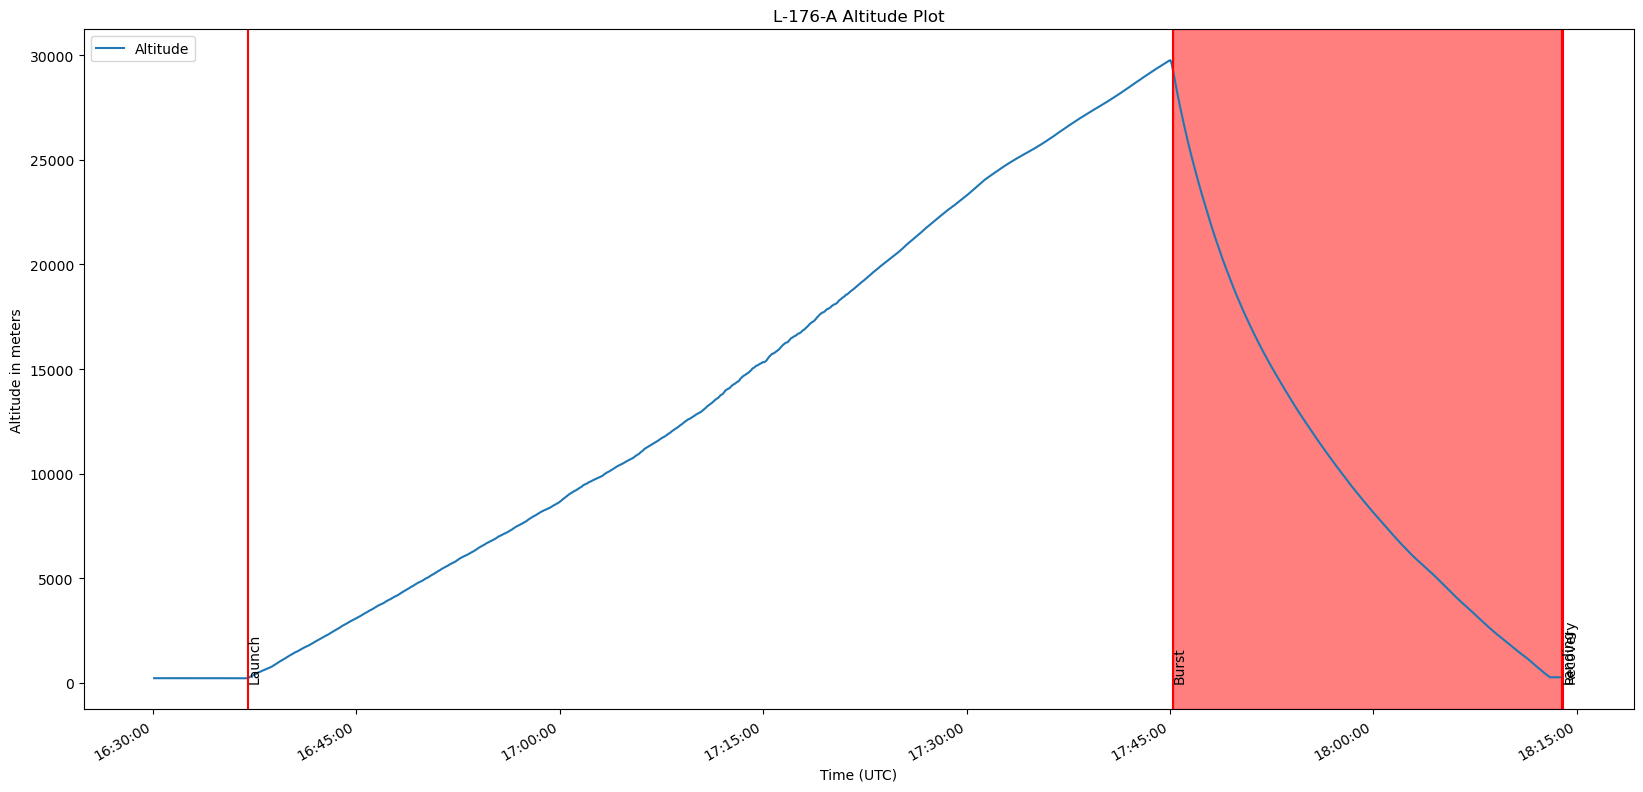

In [13]:
har_df.plot(title='{} Altitude Plot'.format(flight_id),ylabel='Altitude in meters',xlabel='Time (UTC)',x='Time',y='Altitude',figsize=(20, 10))
# Add vertical lines at set times
for time, label in zip(set_times,set_labels):
    plt.axvline(x=time, color='r')
    plt.text(time, 1, label, rotation=90, verticalalignment='bottom')

# Add shaded area between the two vertical lines
plt.axvspan(set_times[1], set_times[2], color='red', alpha=0.5)
# Change x-axis labels to only show time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.savefig('Plots/har_alt_plot.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/har_alt_plot.png',bbox_inches = 'tight',dpi = img_dpi)

## Temperature
Please note that the temperature sensor for HAR was located inside the spacecraft. There will be some self-heating from the sensor and from other equipment inside the spacecraft including the Raspberry Pi and the Rocket M5 which both generate quite a bit of heat during normal operation.

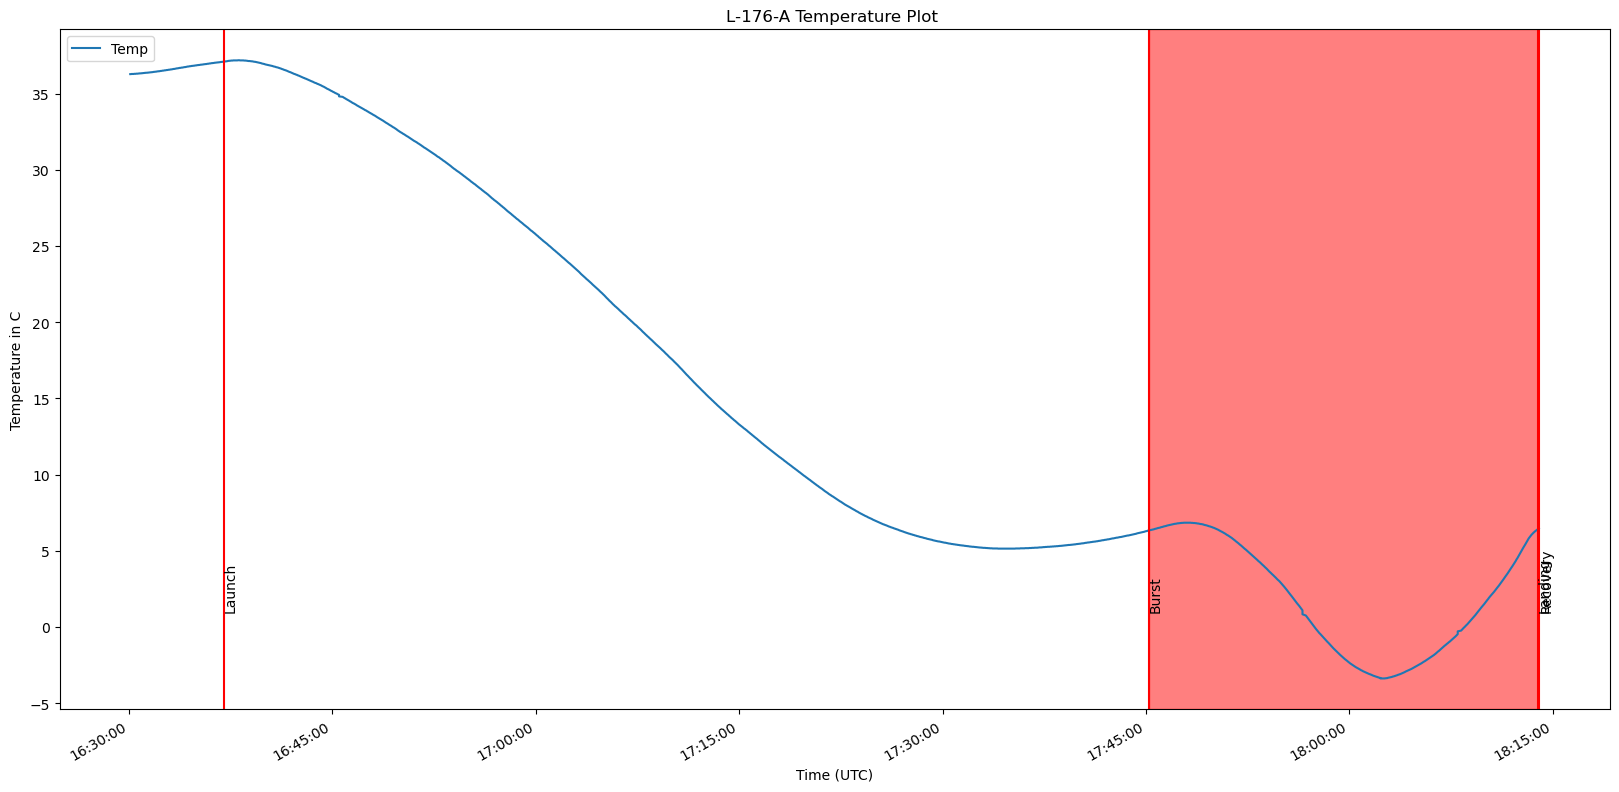

In [14]:
har_df.plot(title='{} Temperature Plot '.format(flight_id),ylabel='Temperature in C',xlabel='Time (UTC)',x='Time',y='Temp',figsize=(20, 10))

# Add vertical lines at set times
for time, label in zip(set_times,set_labels):
    plt.axvline(x=time, color='r')
    plt.text(time, 1, label, rotation=90, verticalalignment='bottom')

# Add shaded area between the two vertical lines
plt.axvspan(set_times[1], set_times[2], color='red', alpha=0.5)
# Change x-axis labels to only show time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.savefig('Plots/har_temp_plot.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/har_temp_plot.png',bbox_inches = 'tight',dpi = img_dpi)

## Humidity


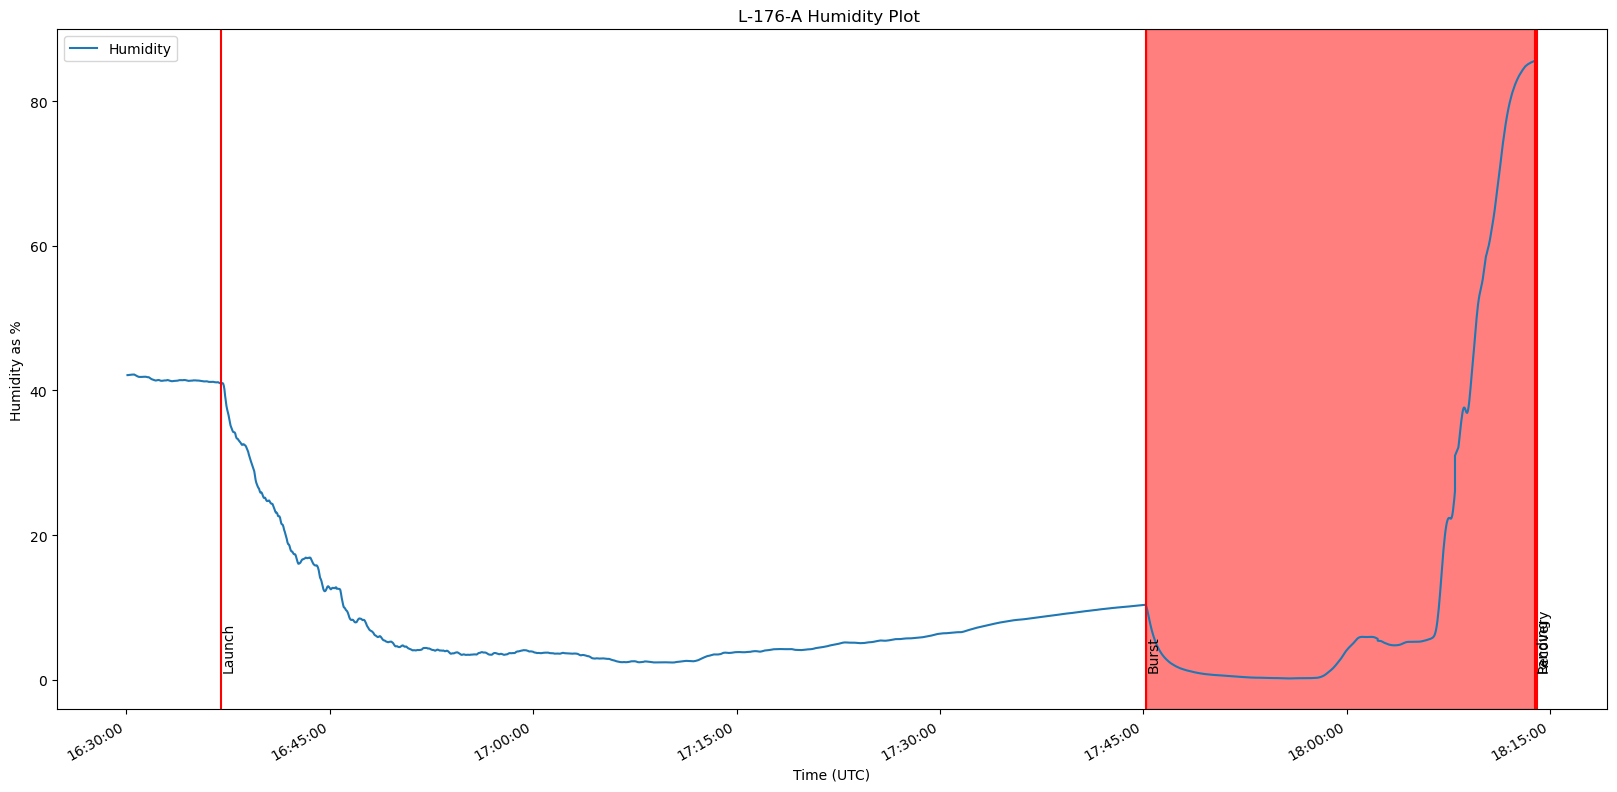

In [15]:
har_df.plot(title='{} Humidity Plot '.format(flight_id),ylabel='Humidity as %',xlabel='Time (UTC)',x='Time',y='Humidity',figsize=(20, 10))

# Add vertical lines at set times
for time, label in zip(set_times,set_labels):
    plt.axvline(x=time, color='r')
    plt.text(time, 1, label, rotation=90, verticalalignment='bottom')

# Add shaded area between the two vertical lines
plt.axvspan(set_times[1], set_times[2], color='red', alpha=0.5)
# Change x-axis labels to only show time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.savefig('Plots/har_humidity_plot.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/har_humidity_plot.png',bbox_inches = 'tight',dpi = img_dpi)

## Pressure


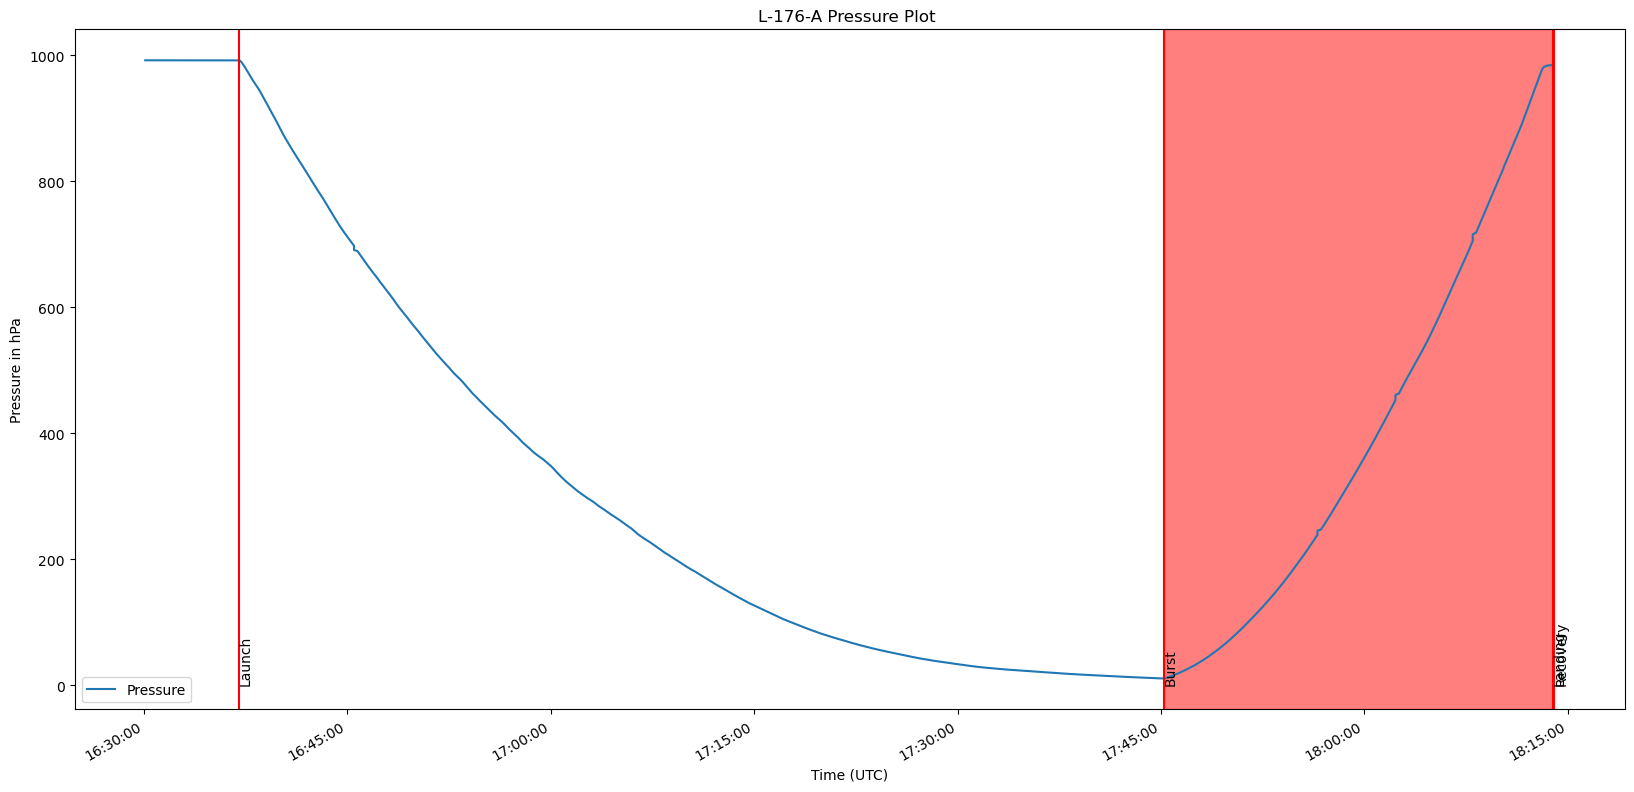

In [16]:
har_df.plot(title='{} Pressure Plot '.format(flight_id),ylabel='Pressure in hPa',xlabel='Time (UTC)',x='Time',y='Pressure',figsize=(20, 10))

# Add vertical lines at set times
for time, label in zip(set_times,set_labels):
    plt.axvline(x=time, color='r')
    plt.text(time, 1, label, rotation=90, verticalalignment='bottom')

# Add shaded area between the two vertical lines
plt.axvspan(set_times[1], set_times[2], color='red', alpha=0.5)
# Change x-axis labels to only show time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.savefig('Plots/har_pressure_plot.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/har_pressure_plot.png',bbox_inches = 'tight',dpi = img_dpi)

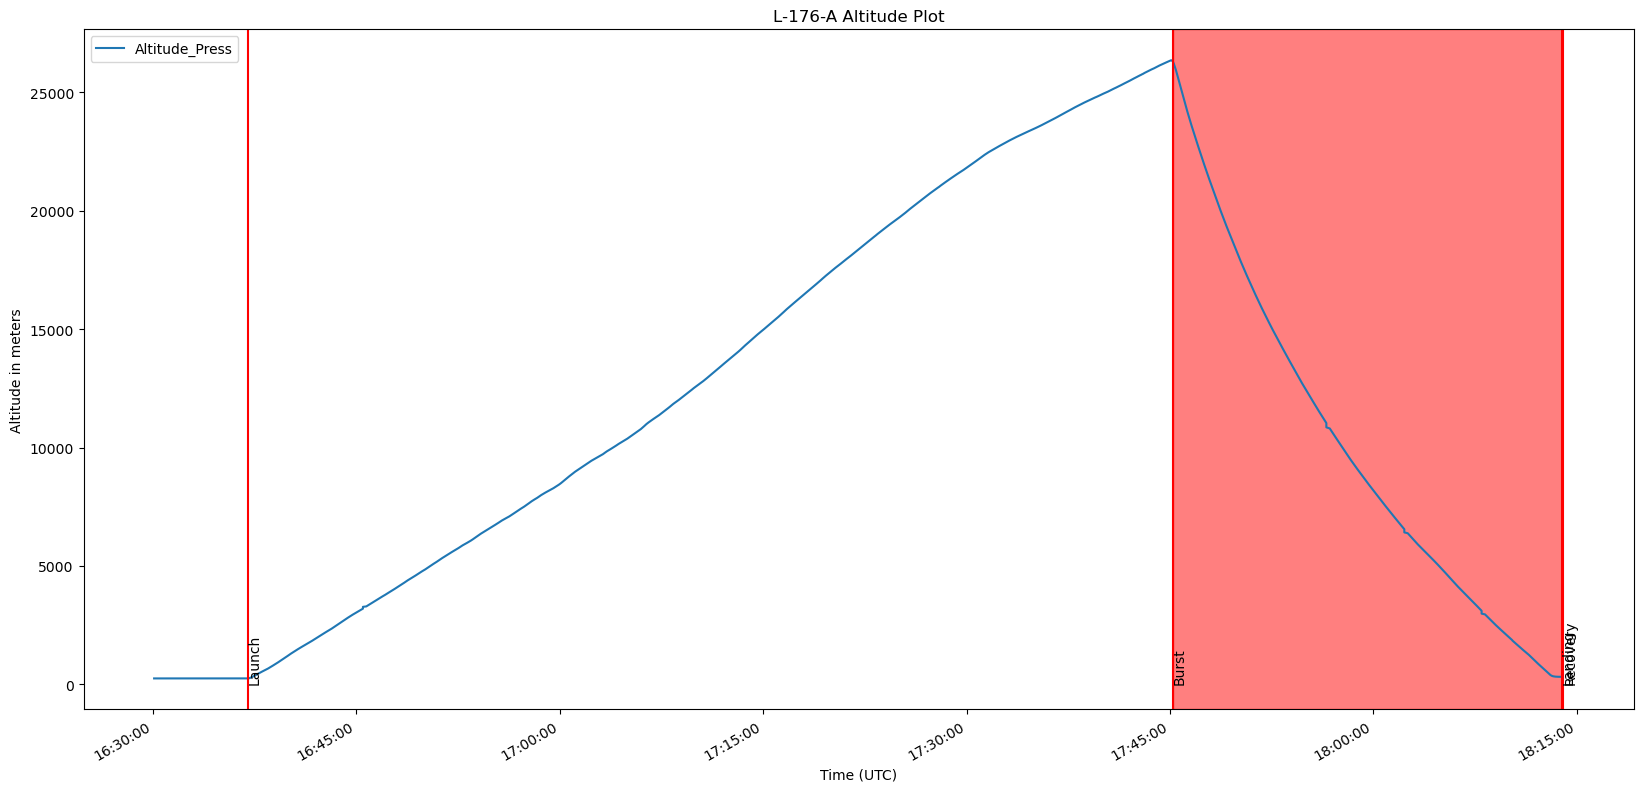

In [17]:
# Convert pressure to altitude
har_df['Altitude_Press'] = pressure_to_altitude(har_df['Pressure'])

# Plot altitude
har_df.plot(title='{} Altitude Plot'.format(flight_id), ylabel='Altitude in meters', xlabel='Time (UTC)', x='Time', y='Altitude_Press', figsize=(20, 10))

# Add vertical lines at set times
for time, label in zip(set_times,set_labels):
    plt.axvline(x=time, color='r')
    plt.text(time, 1, label, rotation=90, verticalalignment='bottom')

# Add shaded area between the two vertical lines
plt.axvspan(set_times[1], set_times[2], color='red', alpha=0.5)
# Change x-axis labels to only show time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.savefig('Plots/har_pressure_plot_alt.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/har_pressure_plot_alt.png',bbox_inches = 'tight',dpi = img_dpi)

## Temp vs Altitude
It's useful to look at this data vs Altitude. 

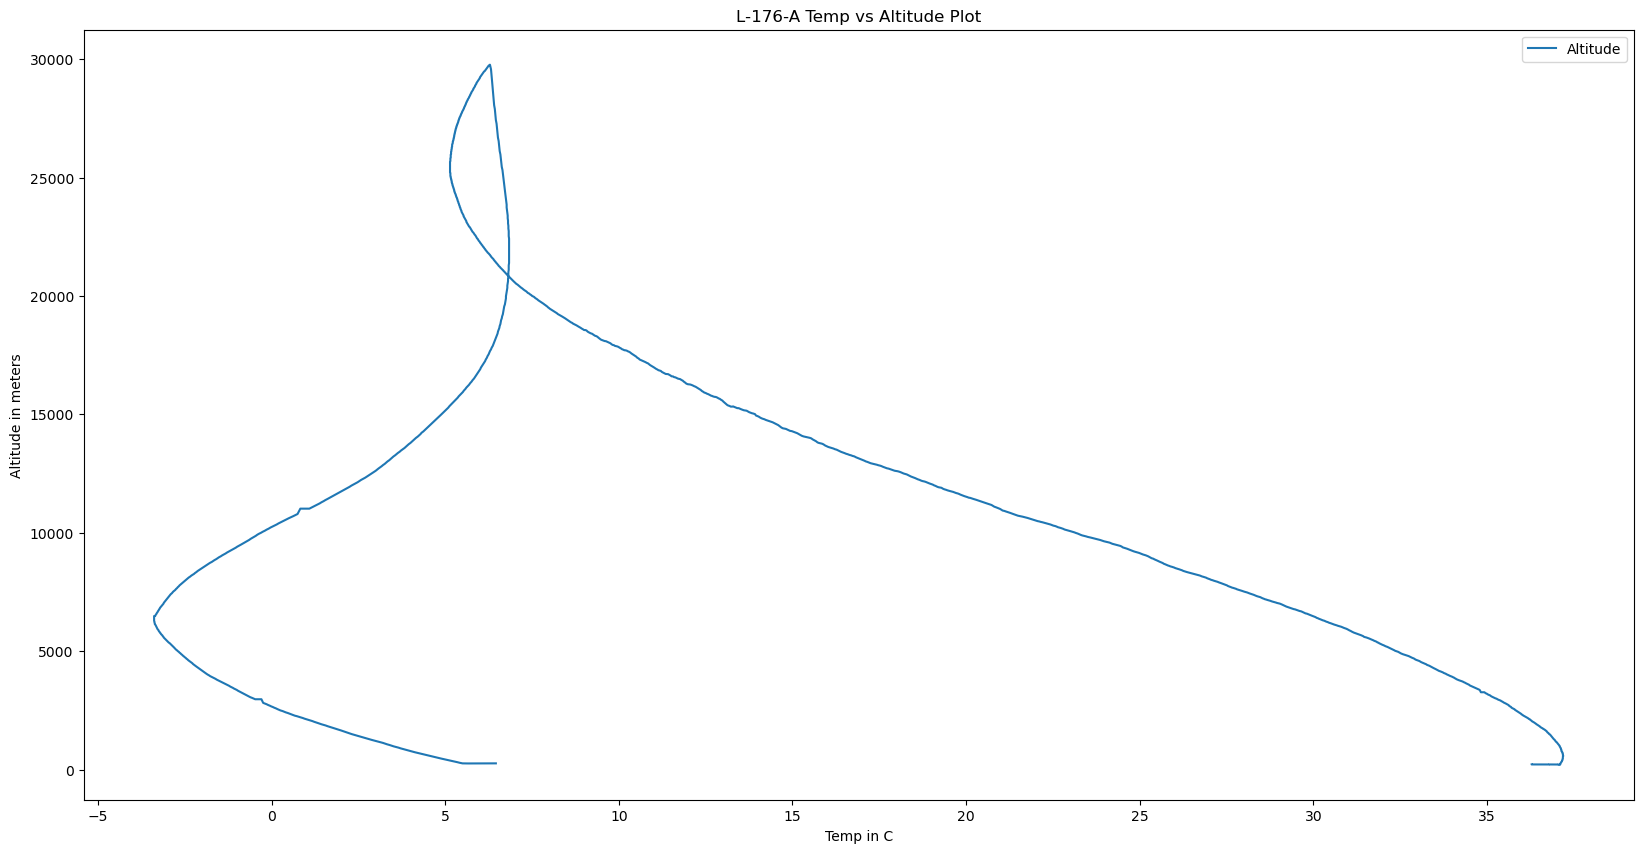

In [18]:
har_df.plot(title='{} Temp vs Altitude Plot'.format(flight_id),ylabel='Altitude in meters',xlabel='Temp in C',x='Temp',y='Altitude',figsize=(20, 10))

plt.savefig('Plots/tempalt_plot.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/tempalt_plot.png',bbox_inches = 'tight',dpi = img_dpi)

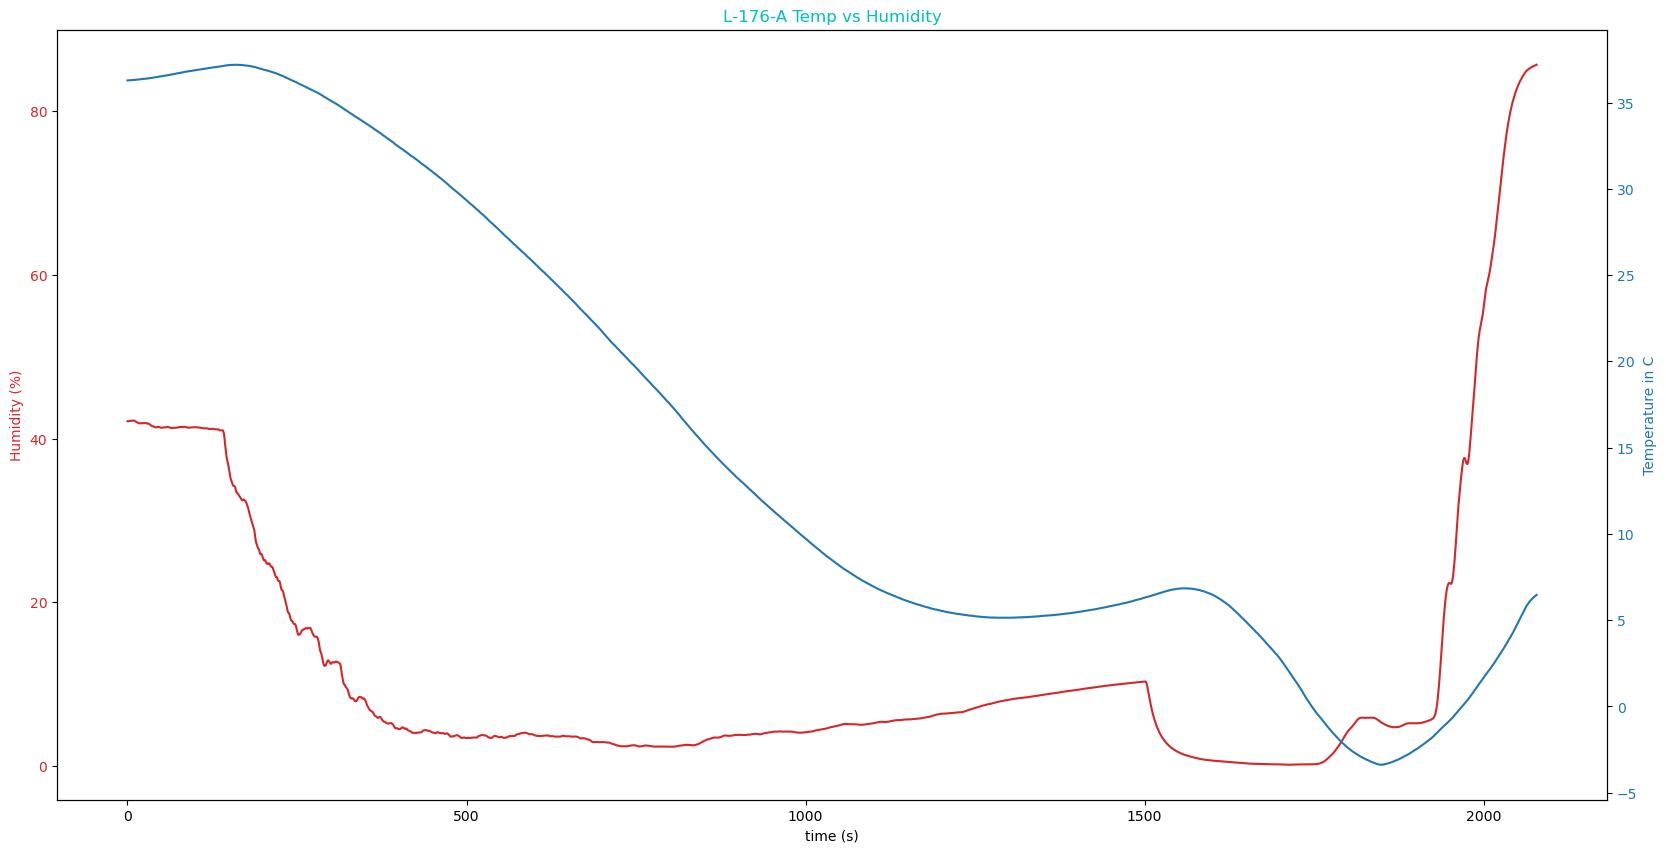

In [19]:
# Setup fixed points for graphing with

# Turn on subplots
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Humidity (%)', color=color)
ax1.plot(har_df.Humidity,color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature in C', color=color)  # we already handled the x-label with ax1
ax2.plot(har_df.Temp)
ax2.tick_params(axis='y', labelcolor=color)

# Always have a good title
plt.title("{} Temp vs Humidity".format(flight_id),color='c')
# This allows us to save our pretty graph so we can frame it later
plt.savefig('Plots/temp_humidity.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/temp_humidity.png',bbox_inches = 'tight',dpi = img_dpi)

# Temp vs Pressure

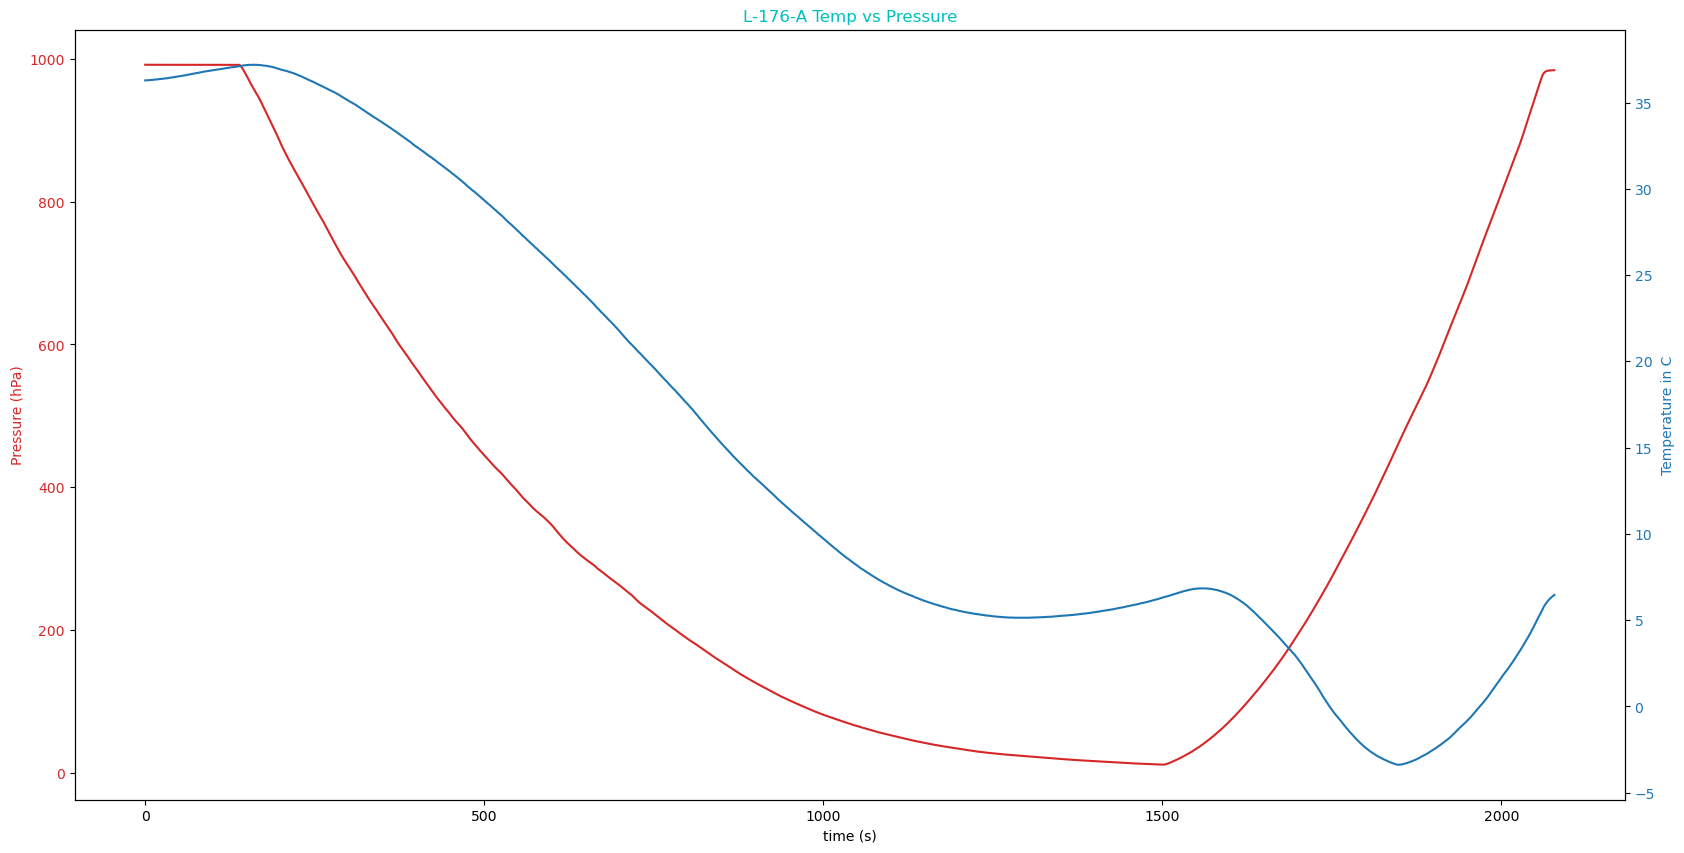

In [20]:
# Setup fixed points for graphing with

# Turn on subplots
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (hPa)', color=color)
ax1.plot(har_df.Pressure,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature in C', color=color)  # we already handled the x-label with ax1
ax2.plot(har_df.Temp)
ax2.tick_params(axis='y', labelcolor=color)

# Always have a good title
plt.title("{} Temp vs Pressure".format(flight_id),color='c')
# This allows us to save our pretty graph so we can frame it later
plt.savefig('Plots/temp_pressure.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/temp_pressure.png',bbox_inches = 'tight',dpi = img_dpi)

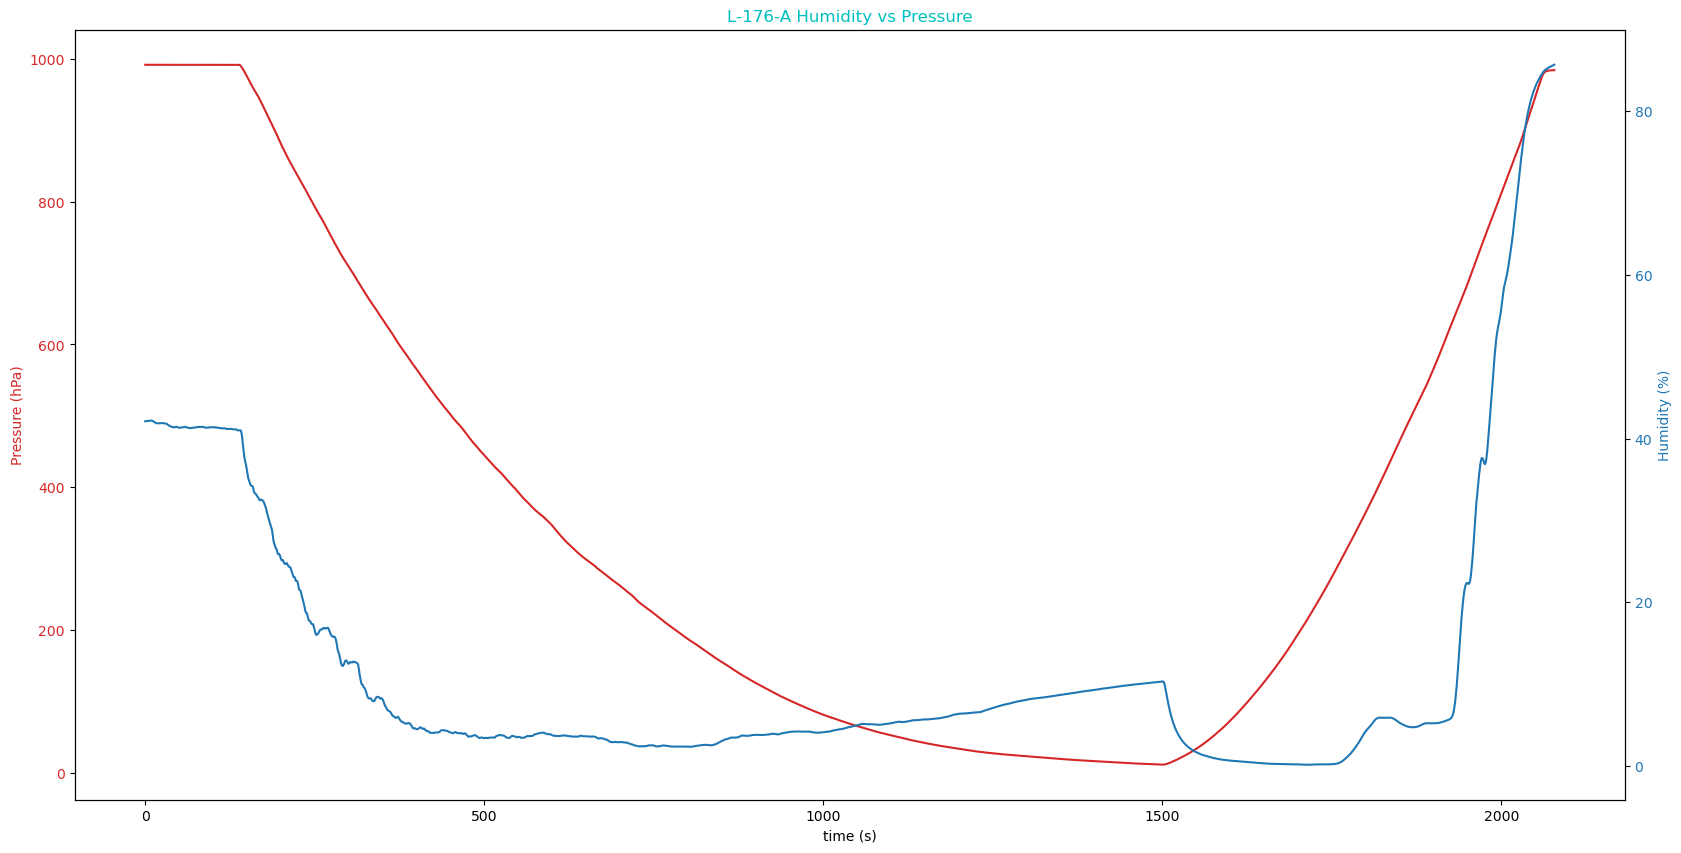

In [21]:
# Setup fixed points for graphing with

# Turn on subplots
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (hPa)', color=color)
ax1.plot(har_df.Pressure,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Humidity (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(har_df.Humidity)
ax2.tick_params(axis='y', labelcolor=color)

# Always have a good title
plt.title("{} Humidity vs Pressure".format(flight_id),color='c')
# This allows us to save our pretty graph so we can frame it later
plt.savefig('Plots/humidity_pressure.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/humidity_pressure.png',bbox_inches = 'tight',dpi = img_dpi)

# Mapping the data
Let's map the data. There are a couple of ways to do this. First, we can save the information as a Keyhole Markup Language (KML). This format is then easy to import into Google Maps or Google Earth. Other systems can import a KML file. 

The second method is to map the data and for that, we can use timemapbase which will download map tiles from Open Street Maps.

In [22]:
tilemapbase.init(create=True)

# Create KML file
A KML file allows us to import the path of the spacecraft into other programs. This allows us to make the KML file and save it.

In [23]:
kml = simplekml.Kml()
linestring = kml.newlinestring(name=flight_id)
har_df.apply(lambda X: linestring.coords.addcoordinates([( X["Lon"],X["Lat"],X["Altitude"])]) ,axis=1)

linestring.altitudemode = simplekml.AltitudeMode.relativetoground
linestring.extrude = 1
linestring.linestyle.color = simplekml.Color.green
linestring.linestyle.width = 5
linestring.polystyle.color = simplekml.Color.orange

#Saving
kml.save("KML/flight.kml")

# Map the data
We can start by graphing the latitude and longitude data. This clearly shows the path, but without a map it does not give us a reference to things such as streets and other features.

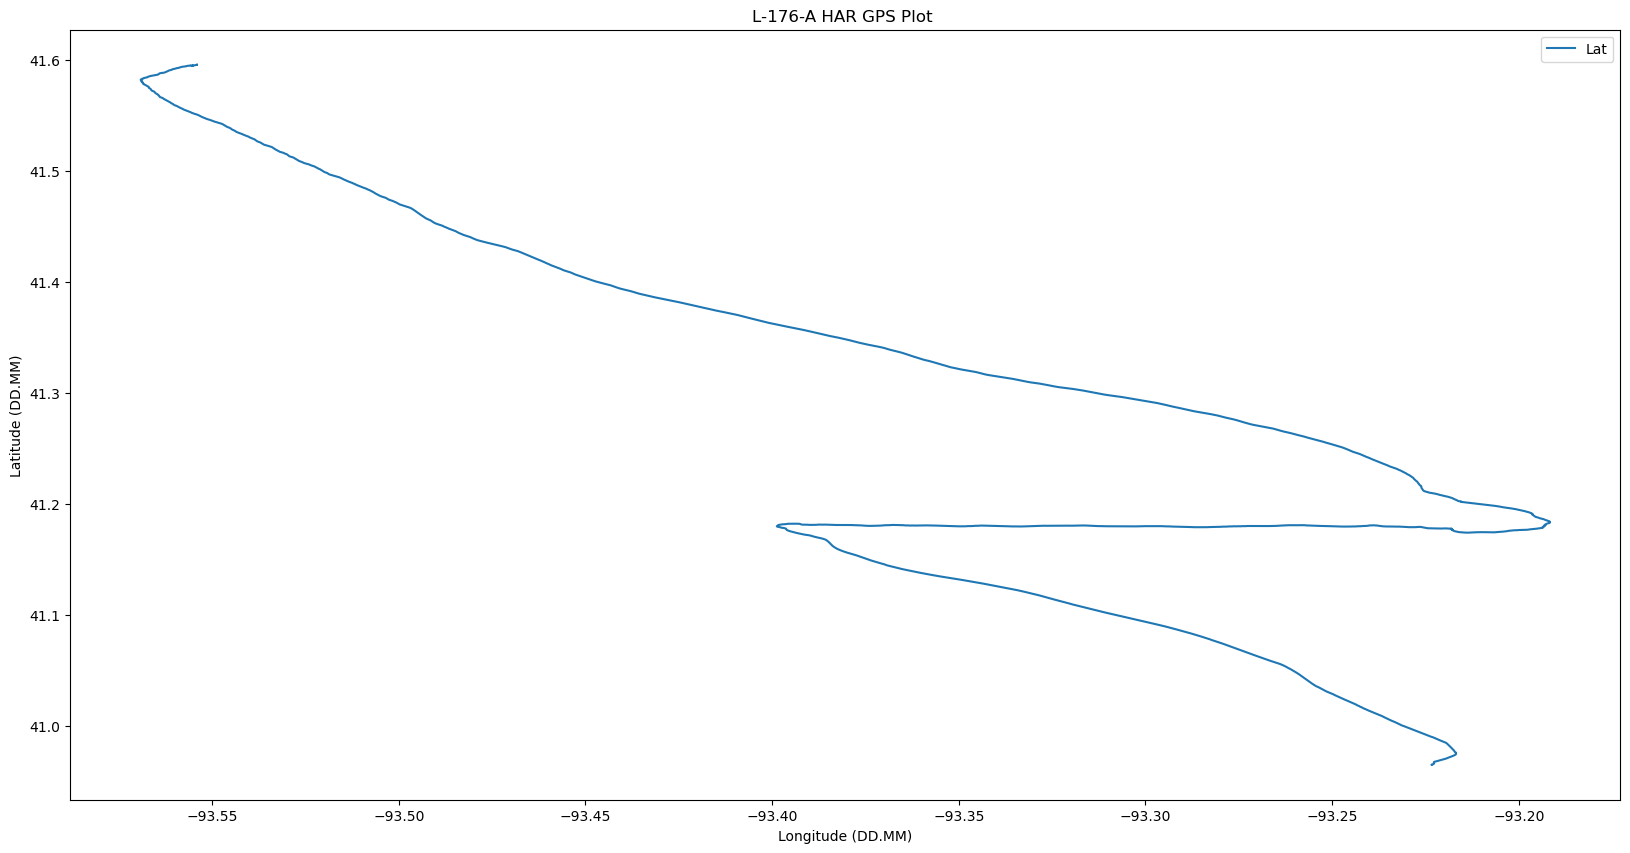

In [24]:
color = 'tab:blue'

har_df.plot(title='{} HAR GPS Plot '.format(flight_id),ylabel='Latitude (DD.MM)',xlabel='Longitude (DD.MM)',x='Lon',y='Lat',figsize=(20, 10))

plt.savefig('Plots/gps_plot_nomap.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/gps_plot_nomap.png',bbox_inches = 'tight',dpi = img_dpi)

## 3D plot
We can do a 3D plot that has the latitude, longitude and altitude. Again, there is no map for a reference but it does give us a fairly good picture of what the flight path looked like.

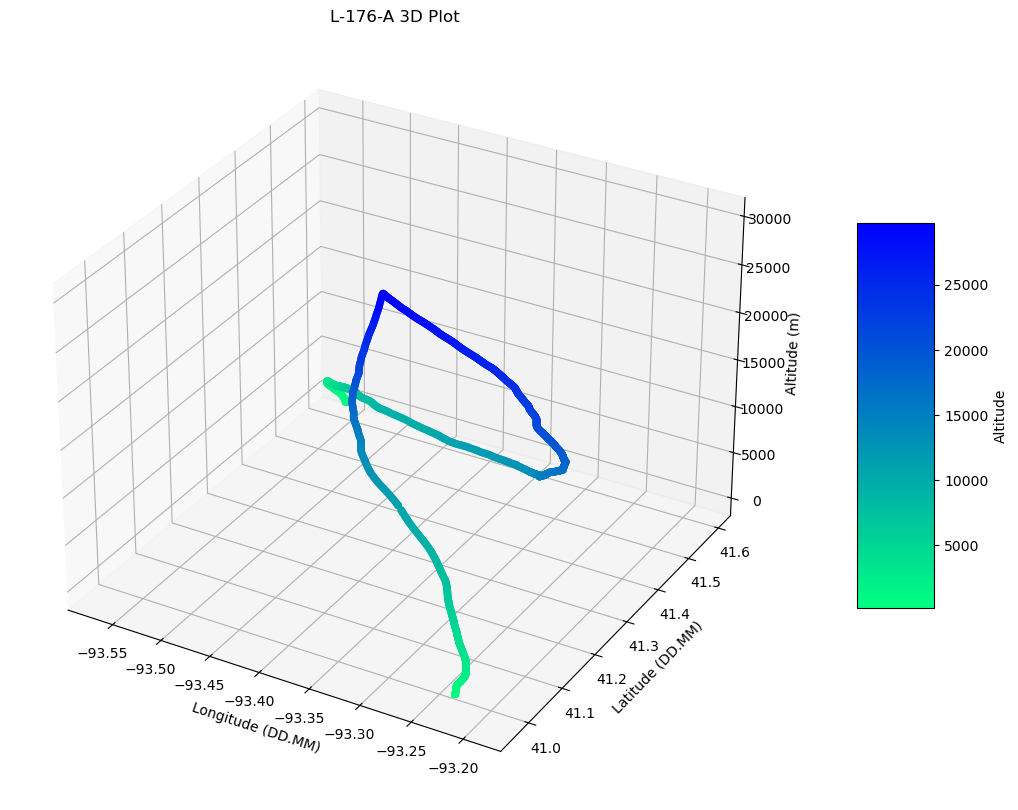

In [25]:
#from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D

ur = (42.133700, -93.494635)
ll = (42.042358, -93.692460)
# Creating a 3D plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting data
scatter = ax.scatter(har_df['Lon'], har_df['Lat'], har_df['Altitude'], c=har_df['Altitude'], cmap='winter_r', marker='o')

ax.plot3D(har_df['Lon'],har_df['Lat'],har_df['Altitude'])
ax.set_xlabel('Longitude (DD.MM)')
ax.set_ylabel('Latitude (DD.MM)')
ax.set_zlabel('Altitude (m)')
ax.set_title('{} 3D Plot'.format(flight_id))

# Adding a color bar to indicate altitude values
color_bar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
color_bar.set_label('Altitude')

plt.savefig('Plots/3D_Map_View.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/3D_Map_View.png',bbox_inches = 'tight',dpi = img_dpi)

## Mapping using BaseMaps
We can use timemapbase to download Open Street Map tiles. We will center this map on the launch location.

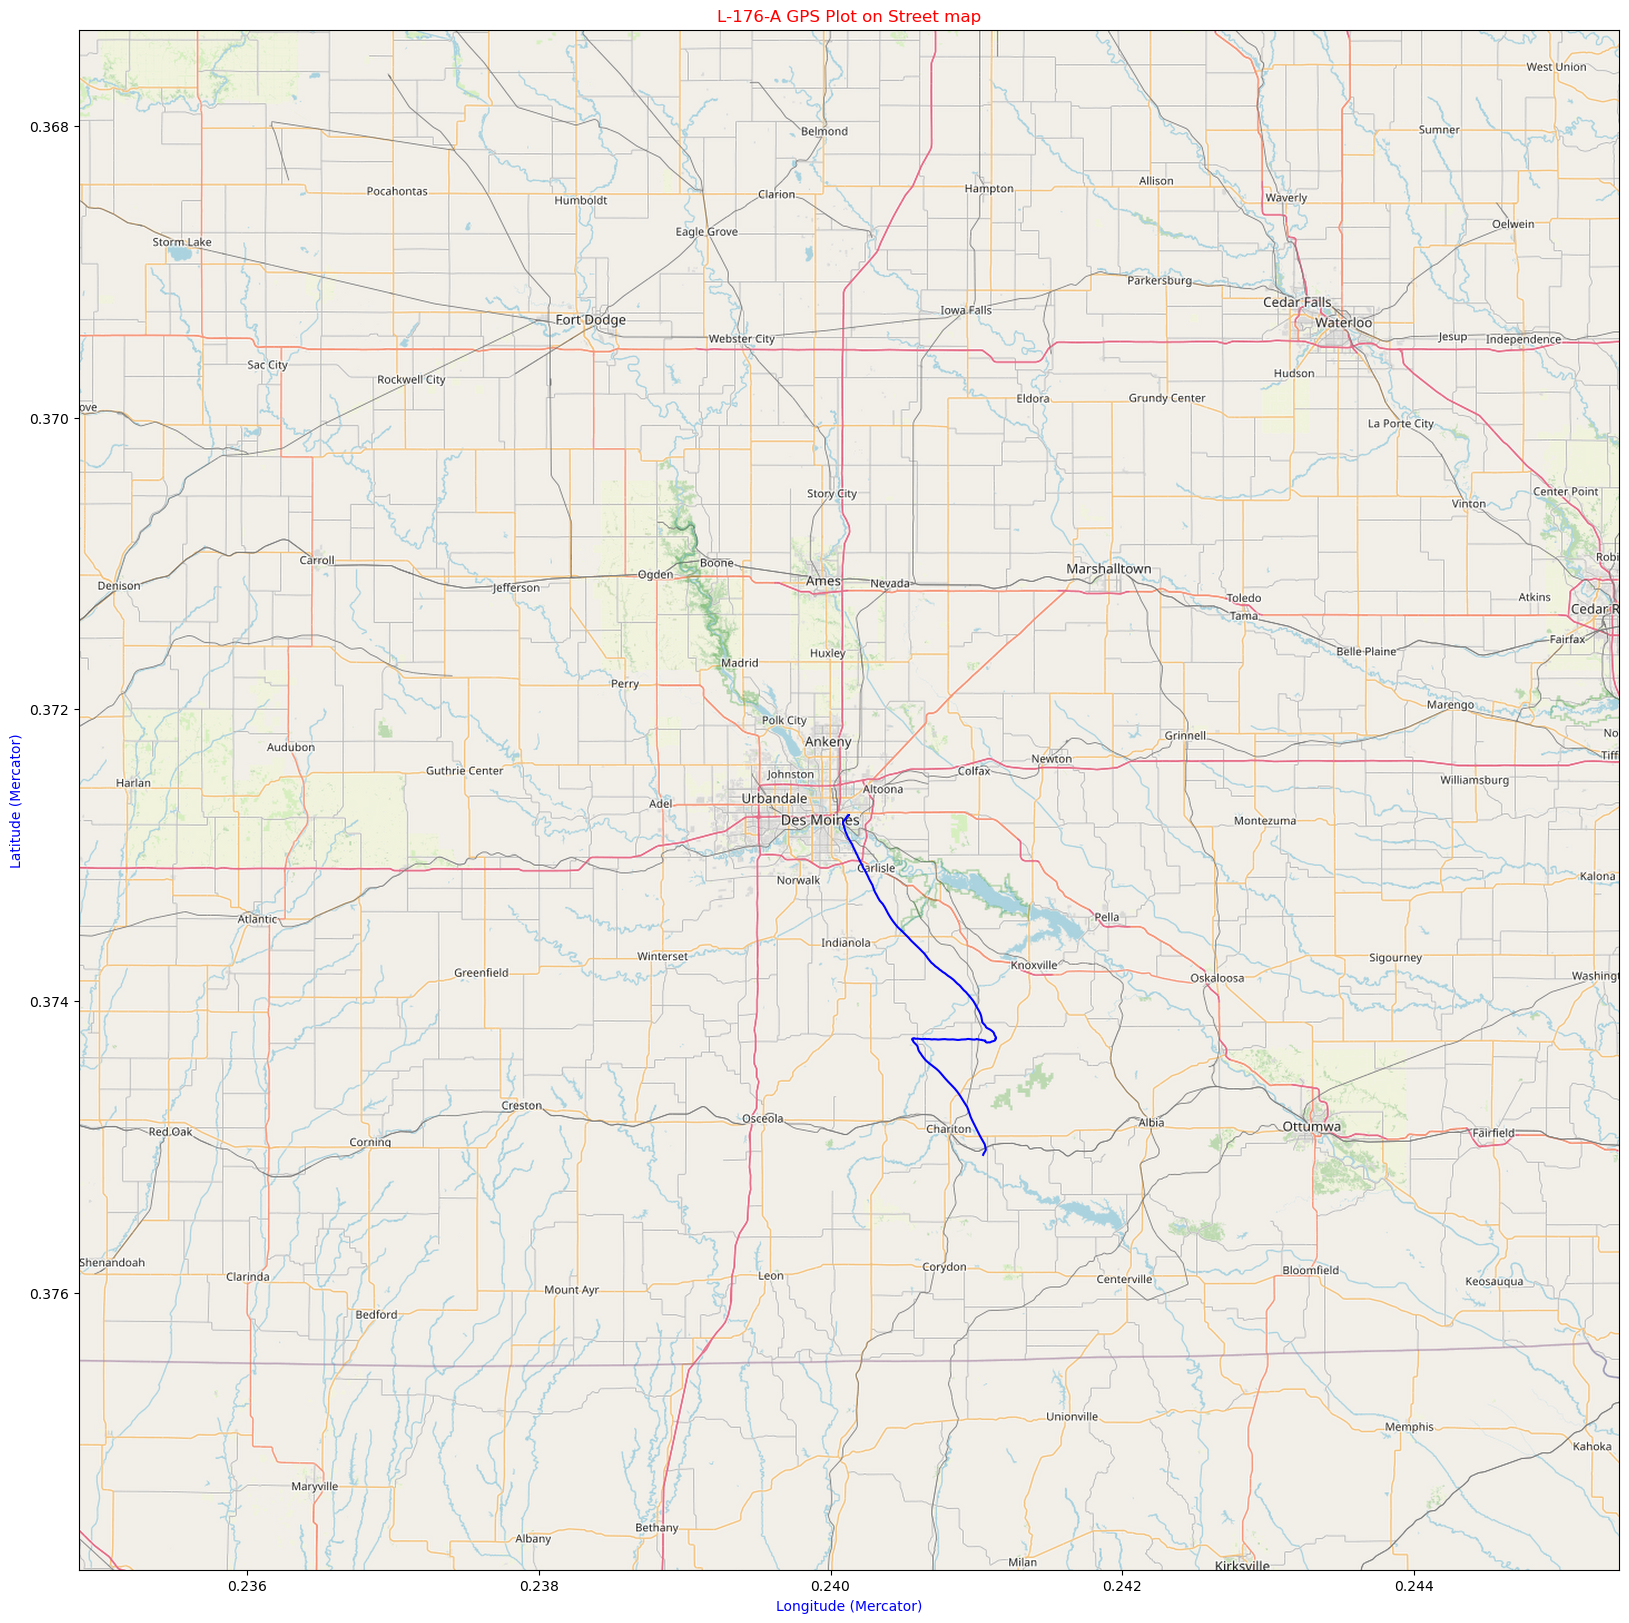

In [26]:
# Define the `extent`
color='blue'

# Zoom, the higher the number the zoomed out it will be. This is centered on
# the launch location
degree_range = 1.9

extent = tilemapbase.Extent.from_lonlat(launch_loc[1] - degree_range, launch_loc[1] + degree_range,
                  launch_loc[0] - degree_range, launch_loc[0] + degree_range)
extent = extent.to_aspect(1.0)

# Convert to web mercator
path = [tilemapbase.project(x,y) for x,y in zip(har_df['Lon'], har_df['Lat'])]
x, y = zip(*path)

fig, ax = plt.subplots(figsize=(20,20))

plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=800)
plotter.plot(ax)
plt.ylabel('Latitude (Mercator)', color=color)
plt.xlabel('Longitude (Mercator)', color=color)

plt.title("{} GPS Plot on Street map".format(flight_id),color='r')

ax.plot(x, y,"b-")
plt.savefig('Plots/gps_plot_map.pdf',bbox_inches = "tight",dpi = img_dpi)
plt.savefig('Plots/gps_plot_map.png',bbox_inches = "tight",dpi = img_dpi)

## Zooming in
We can zoom in, let's zoom in on the landing area. To do this we will change the center area based on the last longitutde and latitude recorded which is at the end of the flight. 

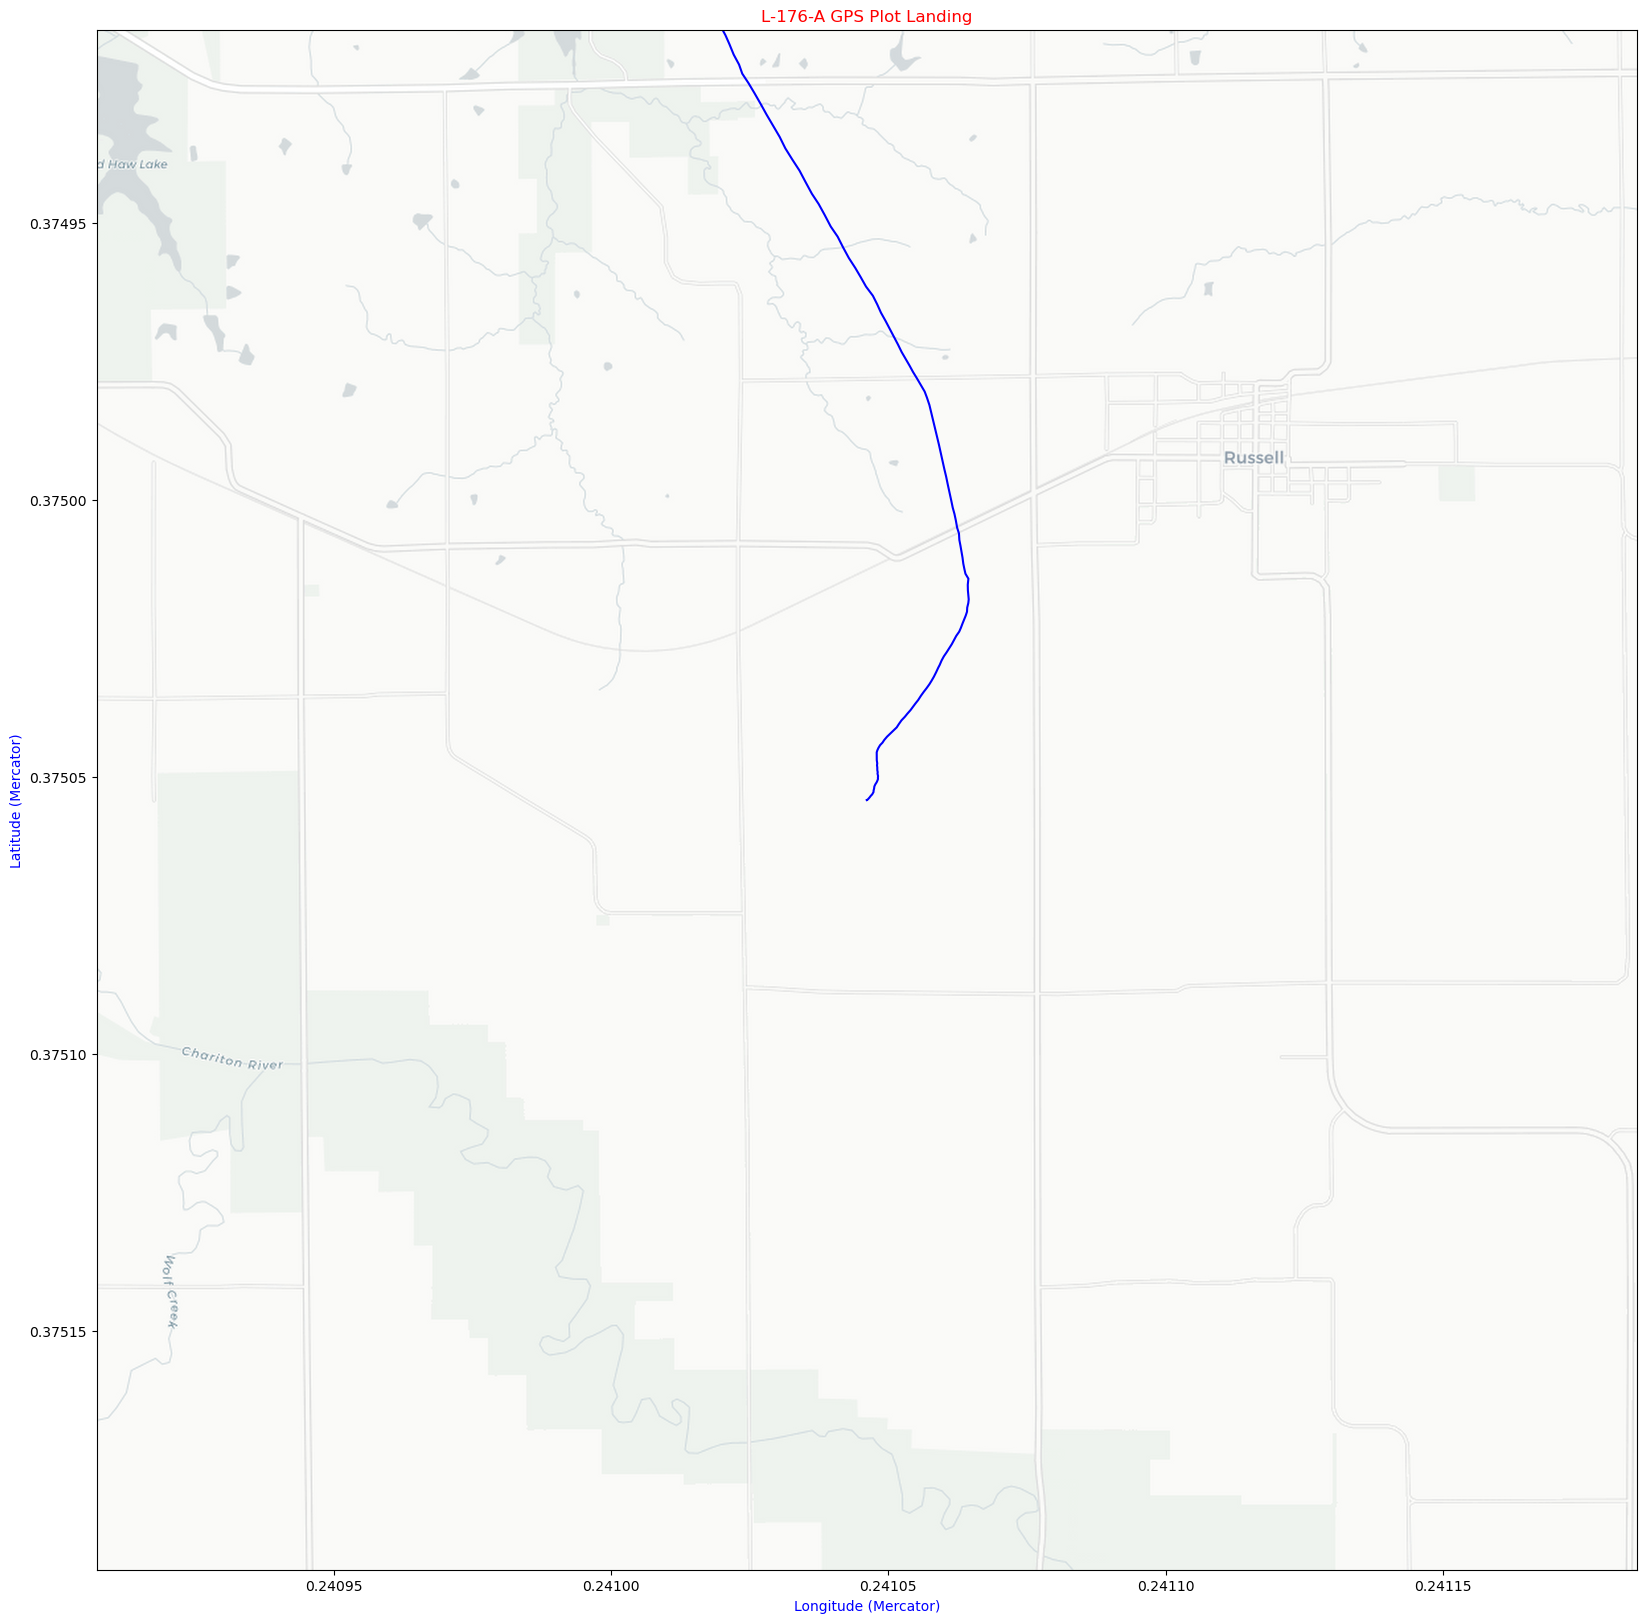

In [27]:
# Define the `extent`
color='blue'

# Zoom, the higher the number the zoomed out it will be. This is centered on
# the landing location
degree_range = 0.05

extent = tilemapbase.Extent.from_lonlat(har_df['Lon'].iloc[-1] - degree_range, har_df['Lon'].iloc[-1] + degree_range,
                  har_df['Lat'].iloc[-1] - degree_range, har_df['Lat'].iloc[-1] + degree_range)
extent = extent.to_aspect(1.0)

# Convert to web mercator
path = [tilemapbase.project(x,y) for x,y in zip(har_df['Lon'], har_df['Lat'])]
x, y = zip(*path)

fig, ax = plt.subplots(figsize=(20,20))
t = tilemapbase.tiles.Carto_Light
plotter = tilemapbase.Plotter(extent, t, width=800)
plotter.plot(ax)
plt.ylabel('Latitude (Mercator)', color=color)
plt.xlabel('Longitude (Mercator)', color=color)

plt.title("{} GPS Plot Landing".format(flight_id),color='r')

ax.plot(x, y,"b-")
plt.savefig('Plots/gps_plot_map_landing.pdf',bbox_inches = "tight",dpi = img_dpi)
plt.savefig('Plots/gps_plot_map_landing.png',bbox_inches = "tight",dpi = img_dpi)